In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy import signal
from scipy.io import wavfile
import sklearn
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from datetime import datetime, timedelta
from audio_function import plot1, plot1_f, mean_data_sep, mean_autocorr_signal, corr_t, corr_f, count_time, cos_sim, cr_arr_t, norm_max, load_mat, first_second_part, filt_freq, variation_data, t_central, t_arr_for_corr_t, df


In [2]:
# Загрузка экспериментальных данных и используемые методы
sample_rate, audio_data49_3 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/ExpSummer2024/TASCAM_Files/TASCAM_0049S3.wav')
sample_rate, audio_data49_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/ExpSummer2024/TASCAM_Files/TASCAM_0049S2.wav')
sample_rate, audio_data16_3 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/ExpSummer2024/TASCAM_Files/TASCAM_0016S3.wav')
sample_rate, audio_data16_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/ExpSummer2024/TASCAM_Files/TASCAM_0016S3.wav')

print(f"Частота дискретизации: {sample_rate} Гц")
print(f"Форма массива данных: {audio_data49_3.shape}")

Частота дискретизации: 44100 Гц
Форма массива данных: (189858816,)


In [3]:
# Создание массивов, используемых в обработке
t_f_arr_1 = cr_arr_t(49)
t_f_arr_2 = cr_arr_t(50)
audio_data49_3_1 = audio_data49_3[t_f_arr_1[0]]
audio_data49_3_2 = audio_data49_3[t_f_arr_2[0]]

audio_data49_2_1 = audio_data49_2[t_f_arr_1[0]]
audio_data49_2_2 = audio_data49_2[t_f_arr_2[0]]

#audio_data16_2_1 = audio_data16_2[t_f_arr_1[0]]
#audio_data16_2_2 = audio_data16_2[t_f_arr_2[0]]

#audio_data16_3_1 = audio_data16_3[t_f_arr_1[0]]
#audio_data16_3_2 = audio_data16_3[t_f_arr_2[0]]



min_len_1 = min(len(audio_data49_3_1),len(audio_data49_2_1))

1
720


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


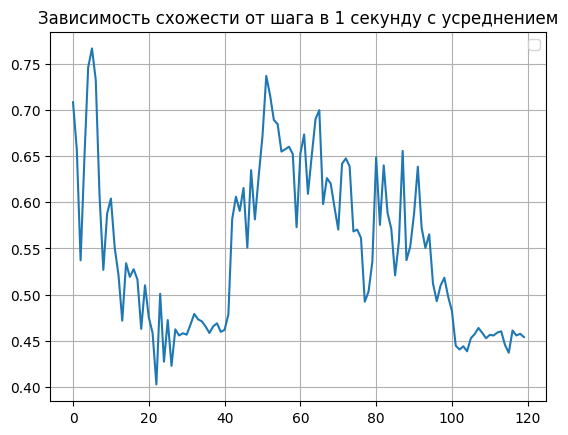

In [31]:
S_N_arr_2 = []
for i in range (0, int(t_f_arr_2[3])):
    i_beg = int(i*44100)
    i_fin = int((i+1)*44100)
    audiodata2_sec = audio_data49_3_2[i_beg:i_fin]
    audiodata2_sec = mean_data_sep(audiodata2_sec, 0.1)
    audio_data49_3_1_sum = mean_data_sep(audio_data49_3_1, 0.1)
    a = cos_sim(audio_data49_3_1_sum, audiodata2_sec, 250)
    S_N_arr_2.append(a)
    
n2 = np.arange(int(len(t_f_arr_2[1])/sample_rate))
plt.plot(n2, S_N_arr_2)
plt.title('Зависимость схожести от шага в 1 секунду с усреднением')
plt.grid(True)
plt.legend()
plt.show()

179.38495922347235
164.69936235240766
178.83457082059002
180.1133712445592
181.58935050614116
191.03176545448935
193.28441195783716
152.5091280209713
132.61676613425078
169.31276571957434
164.16895977129522
154.31400153583445
208.39754602695652
150.7216688277442
133.40277650480903
157.603766775166
160.4866578319114
177.91516775189967
189.41972586307418
168.39874977005007
156.09139053250317
173.9067782170605
154.64241571249624
121.41594857836309
112.92203643219659
136.7992831902809
121.80906869608823
120.99967641513531
190.26344840209836
158.42898624320173
146.07211802007726
162.51550987110375
157.12746015799019
115.64512027733483
152.64876699809753
146.96438335066952
199.68164341741397
167.69742595363044
183.68428880271486
128.57919166507605
104.87238450928687
107.1103763114796
104.58806114714507
166.01143140754422
222.82895002649633
152.7929966350712
177.2847488195934
126.6245995793972
119.8703829344902
112.59727884635933
142.30471198849582
205.81546726360688
202.46528468525477
214.61

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


81.96917560256671
83.62899521880598
84.20364643840782
81.45831628533014
84.8531225092742
80.74528277558127
79.14460657856003
81.78113785240176
90.40150664720764
82.86012297364093
88.58851093437477


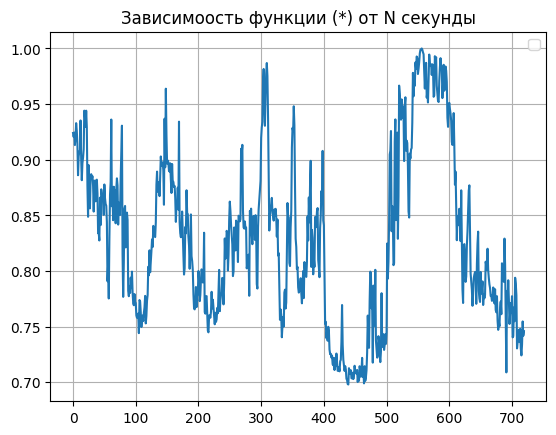

In [ ]:
max_autocorr_signal = []

for i in range (0, int(t_f_arr_2[3])):
    i_beg = int(i*44100)
    i_fin = int((i+1)*44100)
    audiodata2_sec = audio_data49_3_2[i_beg:i_fin]
    audiodata2_sec_mean = mean_data_sep(audiodata2_sec, 0.2)
    audio_data49_3_1_mean = mean_data_sep(audio_data49_3_1, 0.2)
    
    a = mean_autocorr_signal(audio_data49_3_1_mean, audiodata2_sec_mean, 250)
    max_autocorr_signal.append(a)

l = len(max_autocorr_signal)
N_max = np.arange(l)
plt.plot(N_max, max_autocorr_signal)
plt.grid(True)
plt.title('Зависимоость функции (*) от N секунды')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


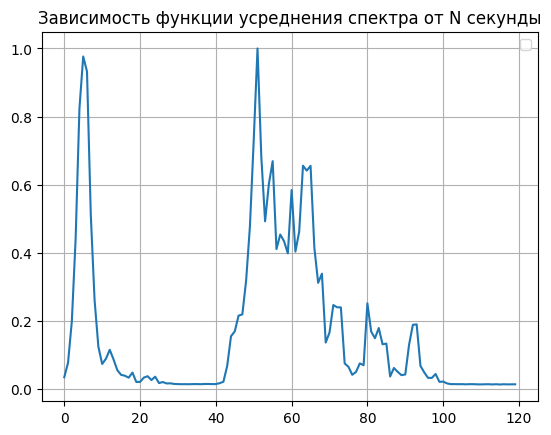

In [29]:
min_spectrum = []
for i in range (0, int(t_f_arr_2[3])):
    i_beg = int(i*44100)
    i_fin = int((i+1)*44100)
    audiodata2_sec = audio_data49_3_2[i_beg:i_fin]
    audiodata2_sec_mean = mean_data_sep(audiodata2_sec, 0.1)
    audio_data49_3_1_mean = mean_data_sep(audio_data49_3_1, 0.1)
    a = np.mean((np.abs(ifft(audiodata2_sec_mean)))**2)
    min_spectrum.append(a)

l = len(min_spectrum)
N_max = np.arange(l)
plt.plot(N_max, norm_max(min_spectrum))
plt.grid(True)
plt.title('Зависимость функции усреднения спектра от N секунды')
plt.legend()
plt.show()

In [ ]:
# Графики исследований
plt.plot(t_f_arr_1[1], audio_data49_3_1, color='brown', label='Small')
plt.show()

plt.plot(t_f_arr_1[1], audio_data49_2_1, color='blue', label='Small')
plt.show()

In [ ]:
plt.plot(t_f_arr_1[2], filt_freq(audio_data49_3_1, 600))
plt.title('Портрет DJI MATRICE 300 RTK')
plt.grid(True)
plt.xlim(-700, 700)
plt.legend()
plt.show

In [ ]:
S_N_arr_autocorr = []
for i in range (0, int(t_f_arr_2[3])):
    i_beg = int(i*sample_rate)
    i_fin = int((i+1)*sample_rate)
    audiodata2_sec = audio_data49_3_2[i_beg:i_fin]
    audiodata2_sec = mean_data_sep(audiodata2_sec, 0.1)
    audio_data49_3_1_m = mean_data_sep(audio_data49_3_1, 0.1)
    a = cos_sim(audio_data49_3_1_m, audiodata2_sec)
    S_N_arr_autocorr.append(a)

corr_t_2_micr = corr_t(audio_data49_3_2, audio_data49_2_2)
t_c = t_arr_for_corr_t(corr_t_2_micr)
plt.plot(t_c, (corr_t_2_micr))
plt.grid(True)
plt.title('Временная корреляция с 2 микрофонов, при пролете около них')
plt.legend()
plt.show()

In [ ]:
corr_t_2_micr = corr_t(audio_data49_3_1, audio_data49_2_1)
t_c = t_arr_for_corr_t(corr_t_2_micr)
plt.plot(t_c, (corr_t_2_micr))
plt.grid(True)
plt.xlim(-0.02, 0.02)
plt.title('Временная корреляция с 2 микрофонов, при пролете около них')
plt.legend()
plt.show

In [ ]:
data1_0db = load_mat('/Users/bogda/Documents/NFS/ Научка/Исходные данные/Matlab_Files/2023.03.31-11.59.31_channel_0.mat')
data1_70db = load_mat('/Users/bogda/Documents/NFS/ Научка/Исходные данные/Matlab_Files/2023.03.31-11.52.03_channel_0.mat')
Fs = 48000
data_first, data_second = first_second_part(data1_0db)
mn = min(len(data_first), len(data_second))
t = np.arange(int(mn))/Fs
t_central = t - mn/Fs/2
f1 = fftfreq(mn, 1 / Fs)
f = fftfreq(min(len(data1_0db), len(data1_70db)), 1 / Fs)
c_t_parts = corr_t(data_first, data_second)
c_f_parts = corr_f(data_first, data_second, 1000)
autocorr_t = corr_t(data_first, data_first)

In [ ]:
print(S_N_f(data1_0db, data1_70db))

In [ ]:
plot1(t_central, autocorr_t, "Автокорреляция")
plot1(t_central, (c_t_parts), "Корреляция 1 и 2 половинки")

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(f1, np.abs(ifft(autocorr_t)), color='blue')
plt.ylabel('Амплитуда, у.е.')
plt.title('Спектр автокорреляции по t 1 половинки дрона')
plt.grid(True)
plt.xlim(-2000, 2000)
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(f1, np.abs(ifft(autocorr_t)), color='blue')
plt.ylabel('Амплитуда, у.е.')
plt.title('Спектр корреляции по t 1 и 2 половинок дрона')
plt.grid(True)
plt.xlim(-2000, 2000)
plt.show()